# **🌧️ Problem Statement:**

## **Create a machine learning model to predict rainfall using Logistic Regression.**


# Building Machine Learning Models:


In [1]:
# Importing NumPy library for numerical operations
import numpy as np

# Importing Pandas library for data manipulation and analysis
import pandas as pd

# Importing Seaborn library for data visualization
import seaborn as sns

# Importing Matplotlib library for creating plots and visualizations
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("/content/sydney_rain prediction.xlsx",header=0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [4]:
# Fill null values in 'MinTemp' column with the mean of 'MinTemp'
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())

# Fill null values in 'MaxTemp' column with the mean of 'MaxTemp'
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())

# Fill null values in 'Rainfall' column with the mean of 'Rainfall'
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())

# Fill null values in 'Evaporation' column with the mean of 'Evaporation'
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())

# Fill null values in 'Sunshine' column with the mean of 'Sunshine'
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())

# Fill null values in 'Humidity9am' column with the mean of 'Humidity9am'
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())

# Fill null values in 'Humidity3pm' column with the mean of 'Humidity3pm'
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())

# Fill null values in 'Pressure9am' column with the mean of 'Pressure9am'
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())

# Fill null values in 'Pressure3pm' column with the mean of 'Pressure3pm'
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())

# Fill null values in 'Cloud9am' column with the mean of 'Cloud9am'
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())

# Fill null values in 'Cloud3pm' column with the mean of 'Cloud3pm'
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

# Fill null values in 'Temp9am' column with the mean of 'Temp9am'
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())

# Fill null values in 'Temp3pm' column with the mean of 'Temp3pm'
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

# Fill null values in 'RainToday' column with the Mode of 'RainToday'
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

In [6]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156


# Outliers Detection

In [7]:
df = df.drop(columns=['Location'])
df = df.drop(columns=['Date'])

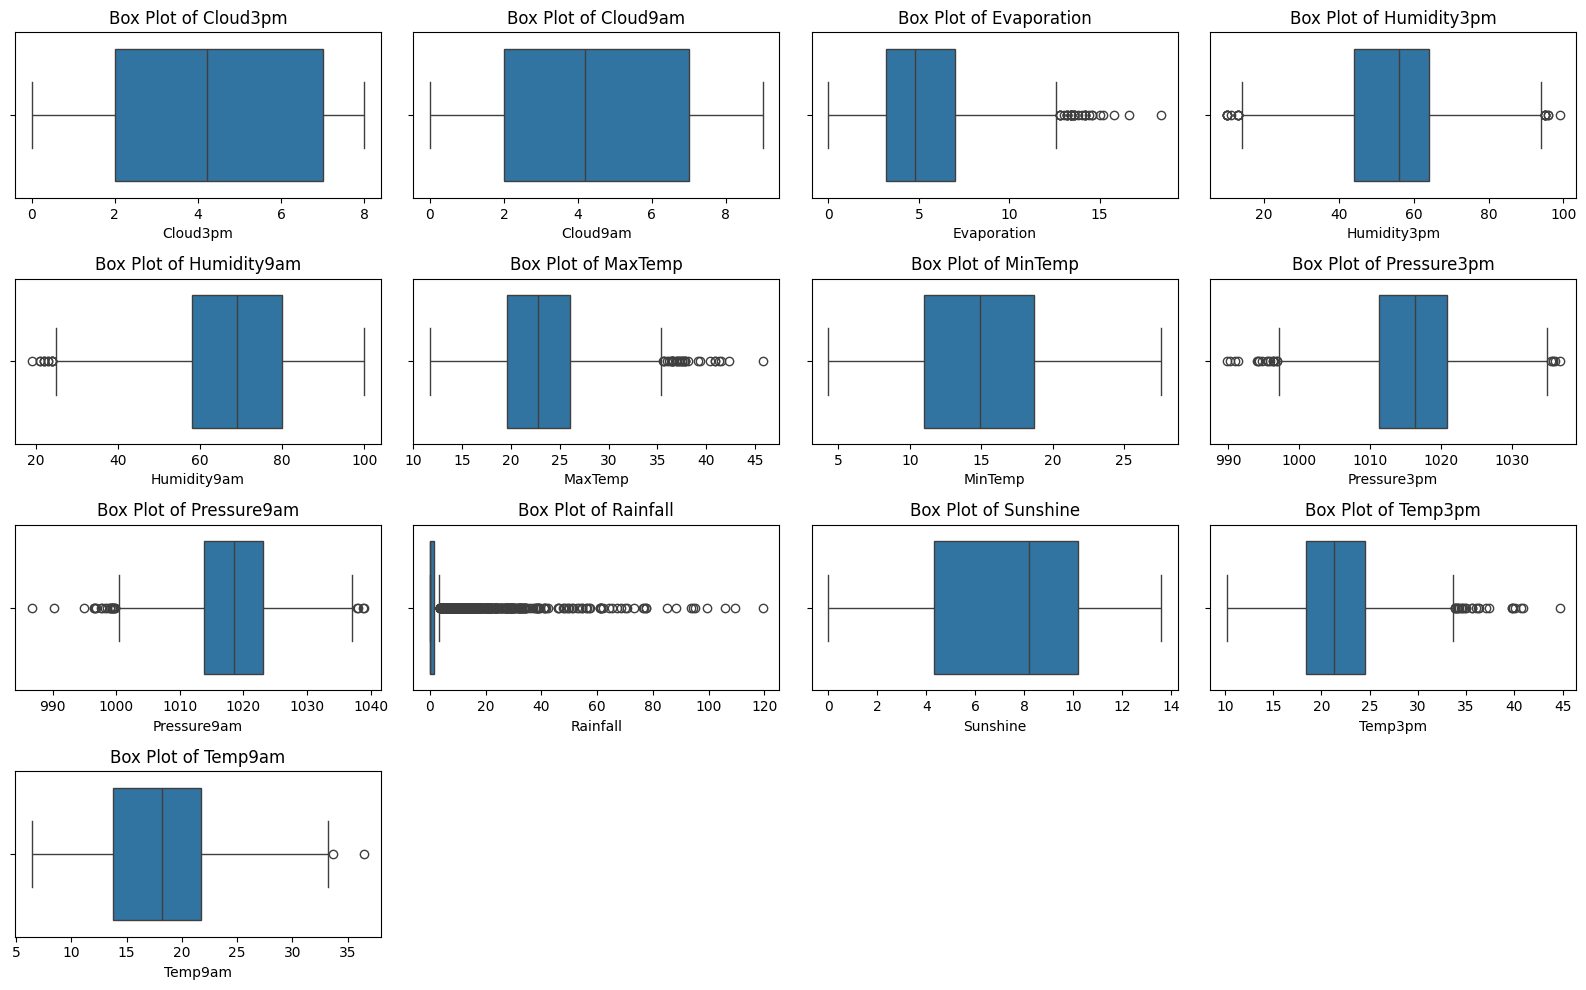

In [8]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['RainToday', 'RainTomorrow'])

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [9]:
df = pd.get_dummies(df,columns = ["RainToday","RainTomorrow"],drop_first = True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


# Outliers Handling

In [10]:
#function to handle outliers using Interquartile range
def handle_outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 -q1
    lower_threshold = q1 - (1.5 * iqr)
    upper_threshold = q3 + (1.5 * iqr)

    df.loc[df[feature] <= lower_threshold, feature] = lower_threshold
    df.loc[df[feature] >= upper_threshold, feature] = upper_threshold

    return df

In [11]:
for column in numerical_columns:
    df = handle_outliers_iqr(df, column)

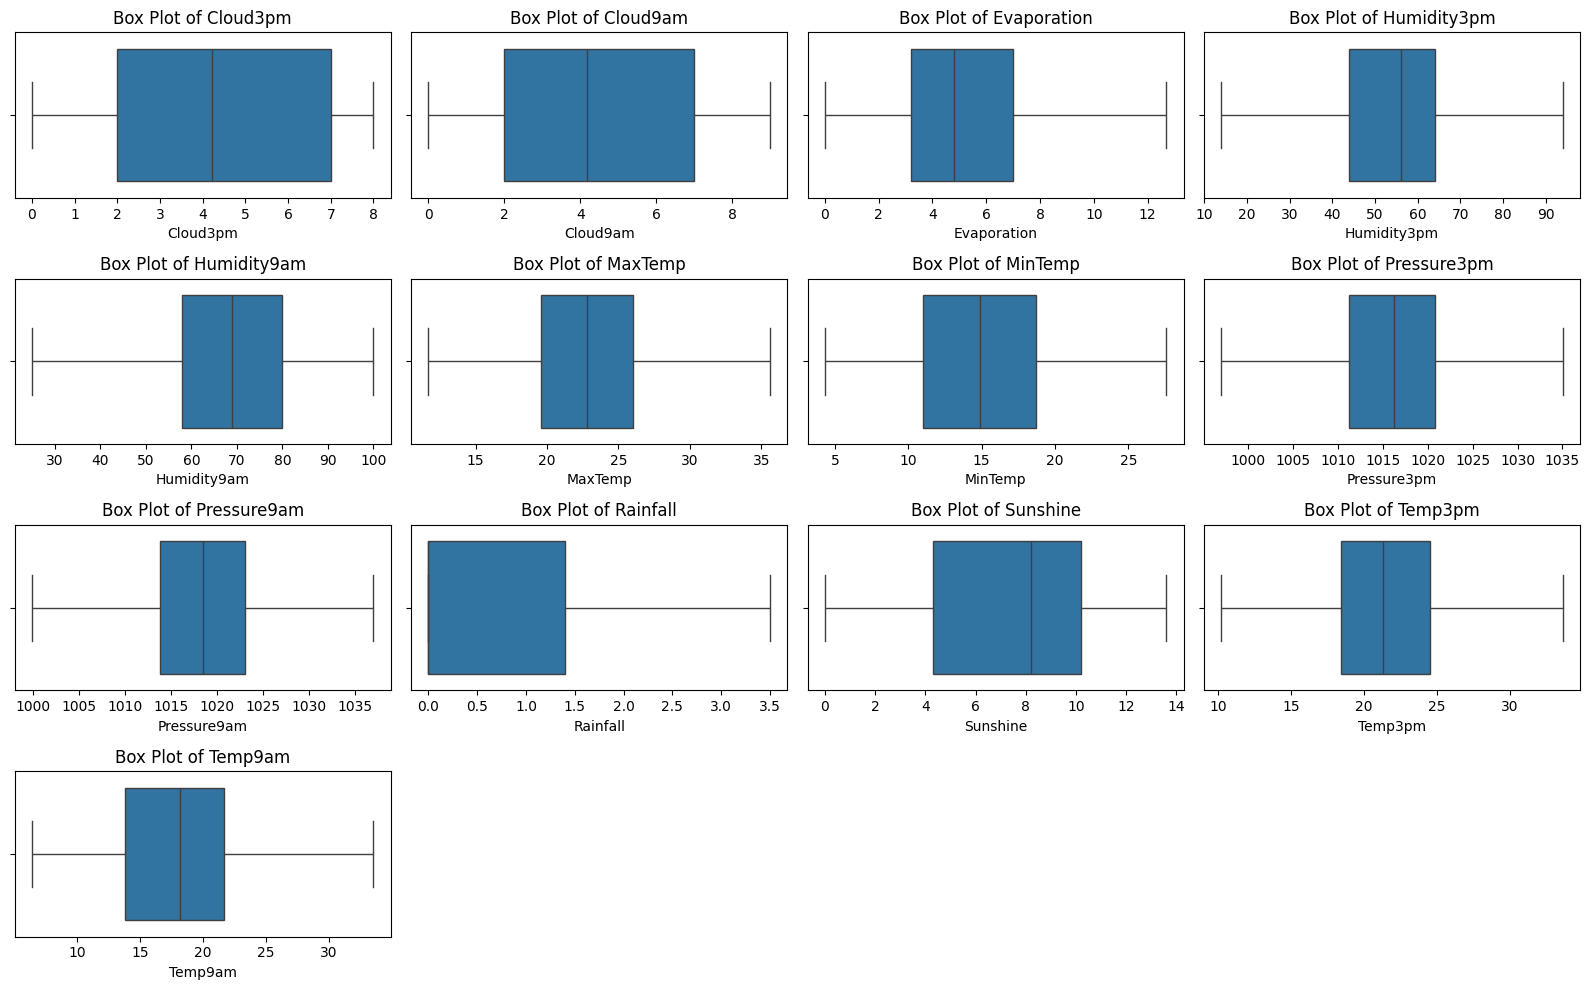

In [12]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference(['RainToday', 'RainTomorrow'])

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

# Split Data into Train and Test

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RainTomorrow_Yes'])
y = df['RainTomorrow_Yes']

# Spliting the data into training and testing sets ( 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (2669, 14)  y: (2669,)
Testing set shape - X: (668, 14)  y: (668,)


# Model Training

# Logistic Regression Classifier

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

In [15]:
# Logistic regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Predict Values
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

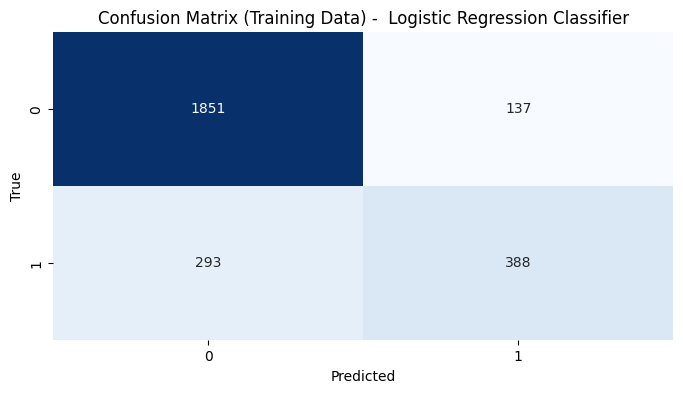

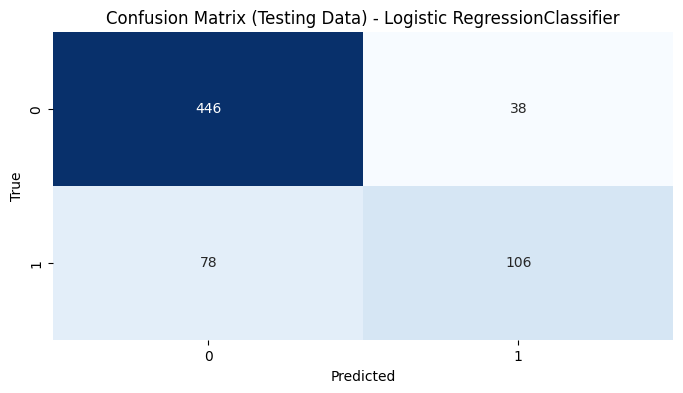

In [22]:
# Confusion Matrix
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d',  cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Training Data) -  Logistic Regression Classifier')
plt.show()

# Visualize Confusion Matrix for Testing Data
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d',  cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data) - Logistic RegressionClassifier')
plt.show()

In [23]:
# Accuracy
print("Accuracy (Train) of Logistic Regression Classifier:", accuracy_score(y_train, y_train_pred))
Logreg_accuracy_score=accuracy_score(y_test, y_test_pred)
print("Accuracy (Test) of Logistic Regression Classifier:",Logreg_accuracy_score,"\n")

# Precision
print("Precision (Train) of Logistic Regression Classifier:", precision_score(y_train, y_train_pred))
Logreg_precision_score=precision_score(y_test, y_test_pred)
print("Precision (Test) of Logistic Regression Classifier:", Logreg_precision_score,"\n")

# Recall
print("Recall (Train) of Logistic Regression Classifier:", recall_score(y_train, y_train_pred))
Logreg_recall_score=recall_score(y_test, y_test_pred)
print("Recall (Test) of Logistic Regression Classifier:",Logreg_recall_score ,"\n")

# ROC AUC Score
print("ROC AUC Score (Train) of Logistic Regression Classifier:", roc_auc_score(y_train, y_train_pred))
Logreg_roc_auc_score= roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score (Test) of Logistic Regression Classifier:",Logreg_roc_auc_score)

Accuracy (Train) of Logistic Regression Classifier: 0.8388909704008992
Accuracy (Test) of Logistic Regression Classifier: 0.8263473053892215 

Precision (Train) of Logistic Regression Classifier: 0.7390476190476191
Precision (Test) of Logistic Regression Classifier: 0.7361111111111112 

Recall (Train) of Logistic Regression Classifier: 0.5697503671071953
Recall (Test) of Logistic Regression Classifier: 0.5760869565217391 

ROC AUC Score (Train) of Logistic Regression Classifier: 0.7504184431109417
ROC AUC Score (Test) of Logistic Regression Classifier: 0.7487872799137621


Text(0.5, 1.0, 'ROC')

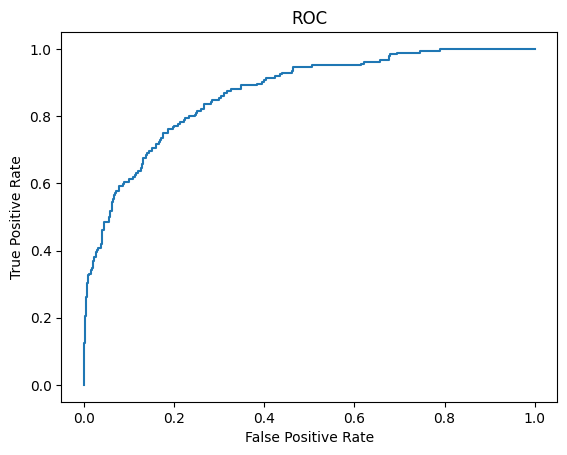

In [24]:
#Calculate the predicted probabilities of the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

#Compute the false positive rate,and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

#compute the Area Under the curve(AUC)
auc = roc_auc_score(y_test, y_pred_proba)

#plot the ROC curve
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')